### 随机梯度下降

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 目标函数:y=2*x^2+3
def func(x):
    return 2*np.square(x)+3

# 目标函数一阶导数:dy/dx=4*x
def dfunc(x):
    return 4 * x

In [3]:
# Gradient Descent
def GD(x_start, df, epochs, lr):
    """
    梯度下降法。给定起始点与目标函数的一阶导函数，求在epochs次迭代中x的更新值
    :param x_start: x的起始点
    :param df: 目标函数的一阶导函数
    :param epochs: 迭代周期
    :param lr: 学习率
    :return: x在每次迭代后的位置（包括起始点），长度为epochs+1
    """
    xs = np.zeros(epochs+1)
    x = x_start
    xs[0] = x
    for i in range(epochs):
        dx = df(x)
        # v表示x要改变的幅度
        v = - dx * lr
        x += v
        xs[i+1] = x
    return xs

In [4]:
def demo_GD():
    """演示如何使用梯度下降法GD()"""
    line_x = np.linspace(-4, 4, 100)
    line_y = func(line_x)

    x_start = -4
    epochs = 10

    lr = 0.1
    x = GD(x_start, dfunc, epochs, lr=lr)

    color = 'g'
    plt.plot(line_x, line_y, c='black')
    plt.plot(x, func(x), c=color, label='SGD')
    #plt.plot(x, func(x), c=color, label='lr={}'.format(lr))
    plt.scatter(x, func(x), c=color,)
    plt.annotate(r'P0', xy=(-3.7, 34), xycoords='data',fontsize=12)
    plt.annotate(r'P1', xy=(-2.1, 14), xycoords='data',fontsize=12)
    plt.annotate(r'P2', xy=(-1.2, 7), xycoords='data',fontsize=12)
    plt.annotate(r'Pn', xy=(0, 4), xycoords='data',fontsize=12)
    plt.legend()
    plt.savefig("fig_chap7_sgd.jpg", dpi=600)
    plt.show()

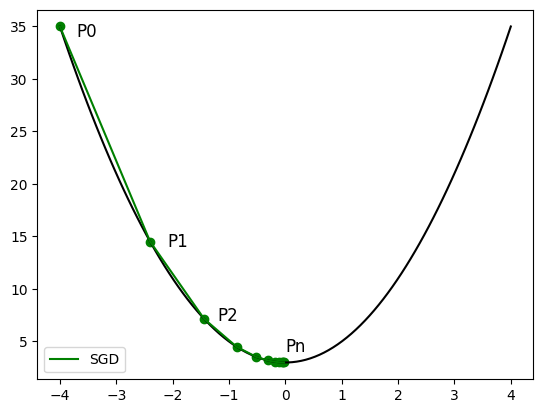

In [5]:
demo_GD()

In [6]:
def demo_GD_lr():
    # 函数图像
    line_x = np.linspace(-4, 4, 100)
    line_y = func(line_x)
    plt.figure('Gradient Desent: Learning Rate')

    x_start = -4
    epochs = 5

    lr = [0.01, 0.1, 0.45]

    color = ['r', 'g', 'r']
    size = np.ones(epochs+1) * 10
    size[-1] = 70
    for i in range(len(lr)):
        x = GD(x_start, dfunc, epochs, lr=lr[i])
        plt.subplot(1, 3, i+1)
        plt.subplots_adjust(left=None, bottom=None, right=1.5, top=None,
                wspace=None, hspace=None)
        plt.plot(line_x, line_y, c='black')
        plt.plot(x, func(x), c=color[i], label=r'$\alpha$={}'.format(lr[i]))
        plt.scatter(x, func(x), c=color[i])
        plt.legend()
    plt.tight_layout()
    plt.savefig("fig_chap7_sgd_learning_rate.jpg", dpi=600)
    plt.show()

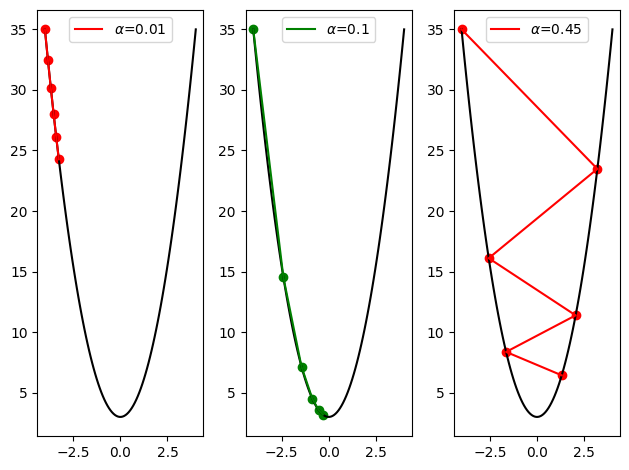

In [7]:
demo_GD_lr()